In [101]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import rs_rad_ker as rk
from modules import convert_qu2eb as qb
from modules import convert_qu2_equ_bqu_new as qq

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [275]:
nside=256 ; npix=h.nside2npix(nside)
sampling=4500
lmax=2*nside ; ell=arange(lmax+1) ; fll=ell*(ell+1)/(2.*pi)

In [276]:
def generate_filament(nside,width,length,apow,apol,threshold=1e-3):
    npix=h.nside2npix(nside)
    thetai=h.pix2ang(nside,arange(npix))[0]*180./pi
    phii=h.pix2ang(nside,arange(npix))[1]*180./pi
    wmask=np.zeros(npix,float); lmask=np.zeros(npix,float)
    lmask[phii<0.5*length]=1 ; lmask[phii>360-0.5*length]=1
    wmask[thetai<90-0.5*width]=1. ; wmask[thetai>90+0.5*width]=1.

    if length==360:
        lmask[:]=1.
        
    if apol>0 and apow>0:
        filament=h.smoothing(lmask,sigma=apol*pi/180.,verbose=False)*h.smoothing(1-wmask,sigma=apow*pi/180.,verbose=False)
    elif apol<=0 and apow>0:
        filament=lmask*h.smoothing(1-wmask,sigma=apow*pi/180.,verbose=False)
    elif apol>0 and apow<=0:
        filament=filament=h.smoothing(lmask,sigma=apol*pi/180.,verbose=False)*(1-wmask)
    else:
        filament=lmask*(1-wmask)
        
    filament=filament/max(filament)
    nzmask=zeros(npix,float) ; eps=threshold*max(filament)
    nzmask[filament>eps]=1.
    return filament,nzmask

# <font color='blue'>General setting</font>
 - We will generate filaments which are oriented parallel to the Galactic plane.
 - The Stokes Q parameter are perpendicular to the Galactic plane, which means that the magnetic field lines are in the $\phi$ direction.
 - The Stokes U parameters are set to 0.

# <font color='green'>Case 1</font>: Looping filaments with coherent magnetic fields
- We consider a filament which loops around the Galactic equator

<IPython.core.display.Javascript object>


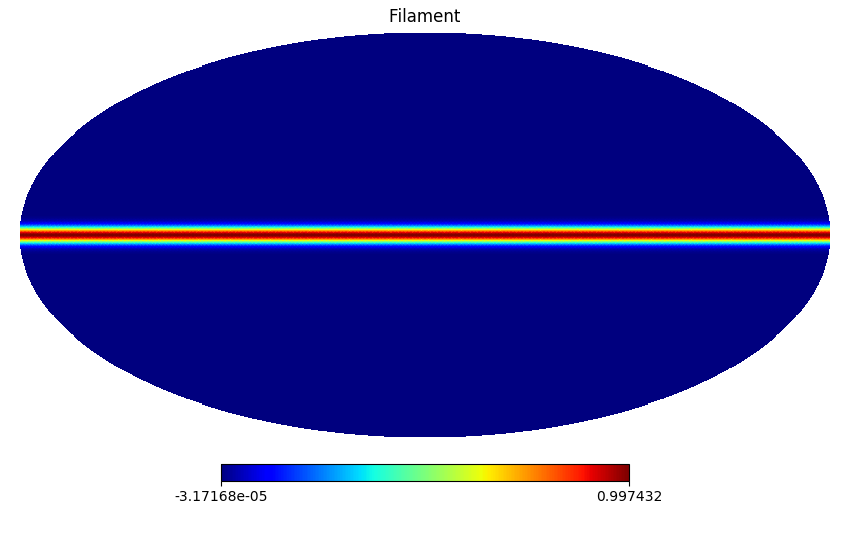

In [332]:
# Generating a filament
filament,nzmask=generate_filament(nside,2,360,2,0)
h.mollview(filament,title="Filament",rot=(0,0))

# Setting the polarization on the filament
filqu=[zeros(npix,float),zeros(npix,float)*filament,ones(npix,float)*filament]

In [333]:
teb=h.alm2map(h.map2alm(filqu,lmax=lmax,pol=True),nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


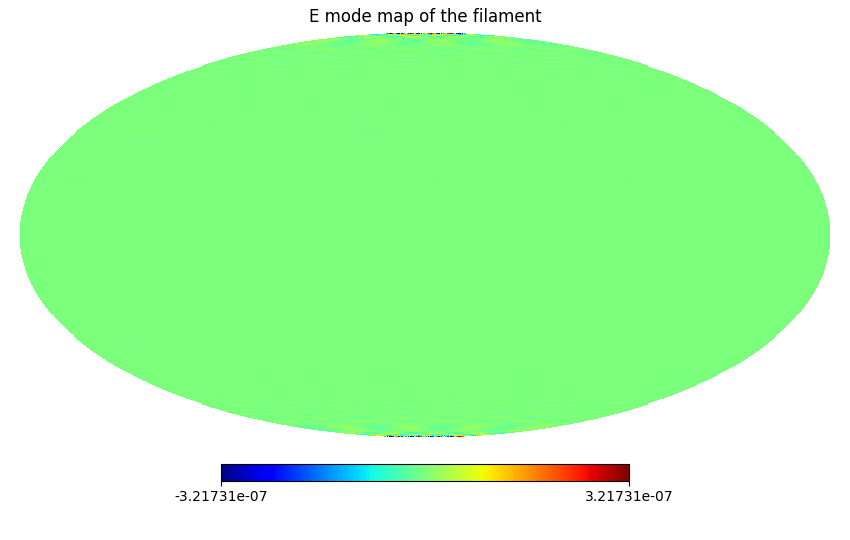

<IPython.core.display.Javascript object>


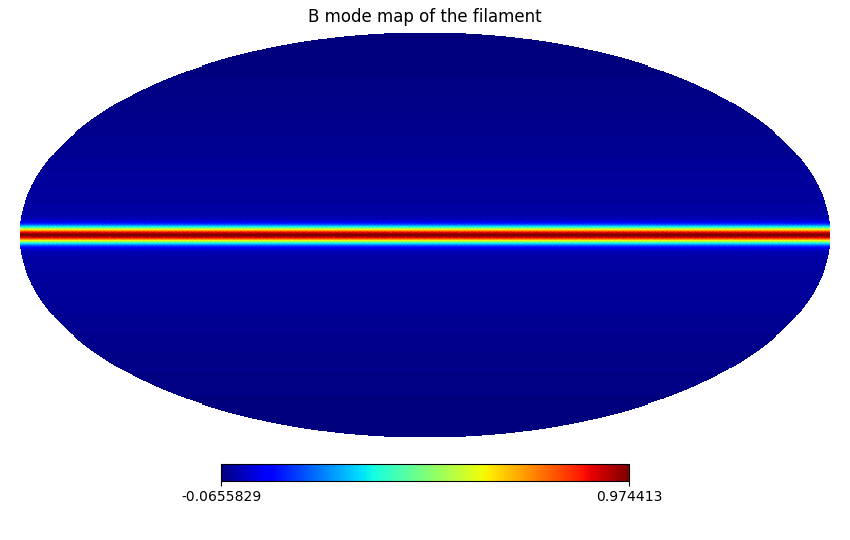

In [334]:
h.mollview(teb[1],title="E mode map of the filament")
h.mollview(teb[2],title="B mode map of the filament")

<IPython.core.display.Javascript object>


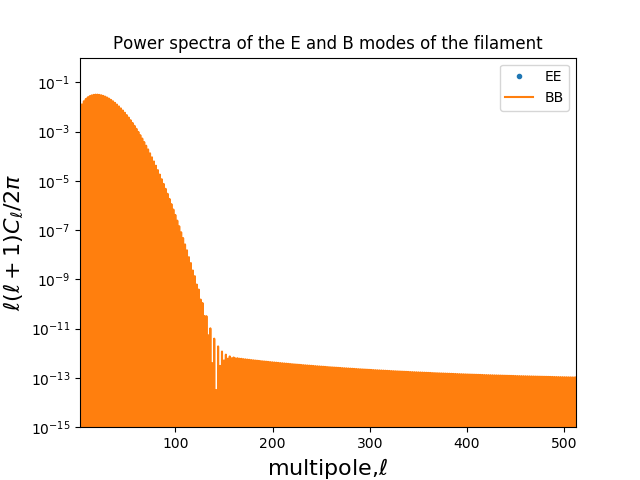

[]

In [335]:
clteb=h.alm2cl(h.map2alm(teb,lmax,pol=False))
figure()
title("Power spectra of the E and B modes of the filament")
plot(ell,fll*clteb[1],".",label="EE")
plot(ell,fll*clteb[2],label="BB")
legend(loc=0)
xlabel("multipole,$\ell$",fontsize=16)
ylabel("$\ell(\ell+1)C_{\ell}/2 \pi$",fontsize=16)
xlim(2,lmax)
ylim(1e-15,1)
#loglog()
semilogy()

# Remarks:
    - When the loop runs all the way round the equator, one only generates E modes and no B modes. (In simulations this would correspond to working with periodic boundry conditions. We will see in the proceeding exploration that this is a potential cause for concern.)
    - This is an unrealistic filament and the real world galactic filaments are likely to have a finite extent. This has important implication for the amount of B-mode power one generates.

# <font color='green'>Case 2</font>: Finite filaments with coherent magnetic fields
- Here we consider filament of finite but different lengths again with the same general setting.

<IPython.core.display.Javascript object>


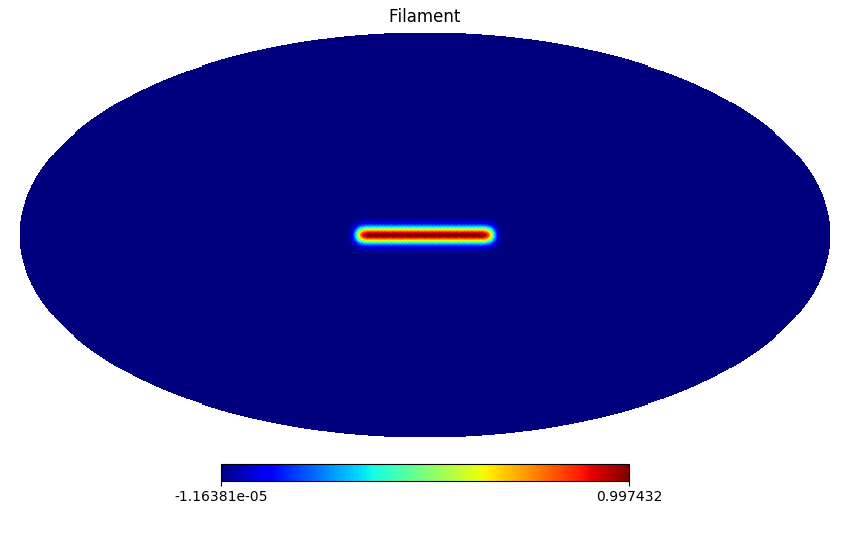

<IPython.core.display.Javascript object>


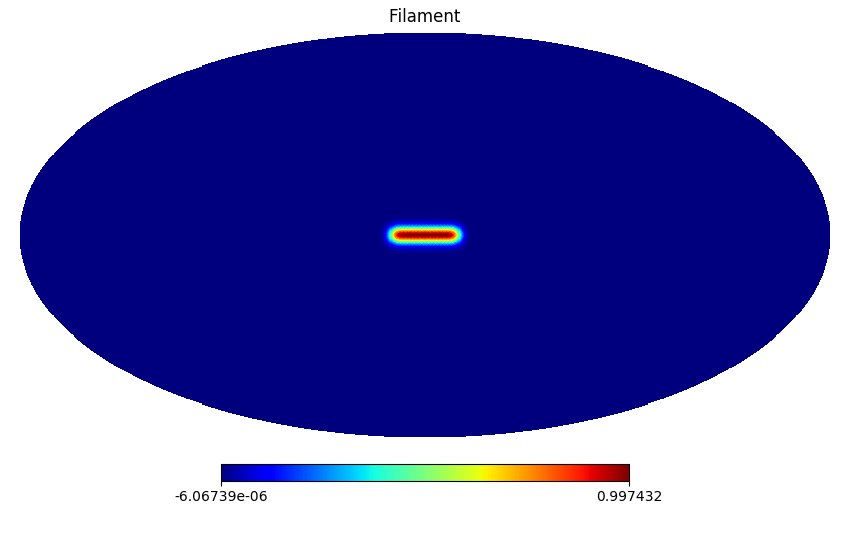

In [337]:
# Generating a filament
filament_l,nzmask_l=generate_filament(nside,2,60,2,2)
filament_s,nzmask_s=generate_filament(nside,2,30,2,2)
h.mollview(filament_l,title="Filament",rot=(0,0))
h.mollview(filament_s,title="Filament",rot=(0,0))

# Setting the polarization on the filament
filqul=[zeros(npix,float),zeros(npix,float)*filament_l,ones(npix,float)*filament_l]
filqus=[zeros(npix,float),zeros(npix,float)*filament_s,ones(npix,float)*filament_s]

In [338]:
tebl=h.alm2map(h.map2alm(filqul,lmax=lmax,pol=True),nside,pol=False)
tebs=h.alm2map(h.map2alm(filqus,lmax=lmax,pol=True),nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


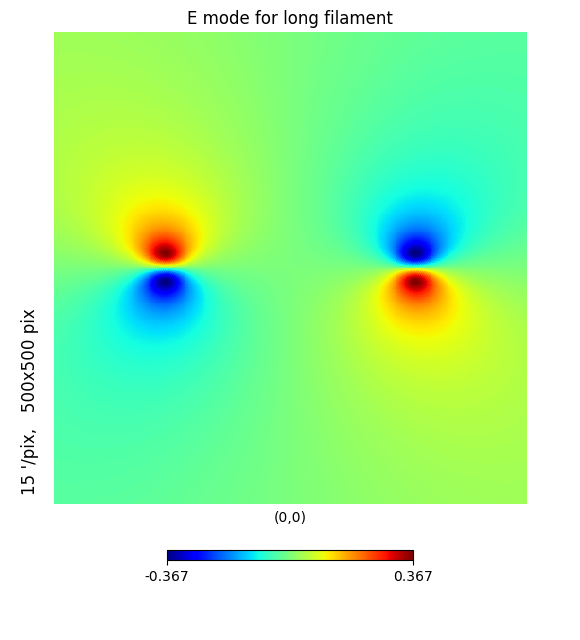

<IPython.core.display.Javascript object>


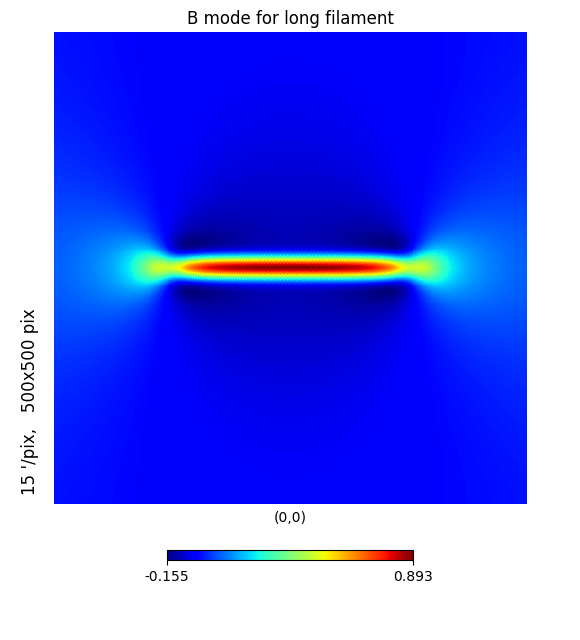

<IPython.core.display.Javascript object>


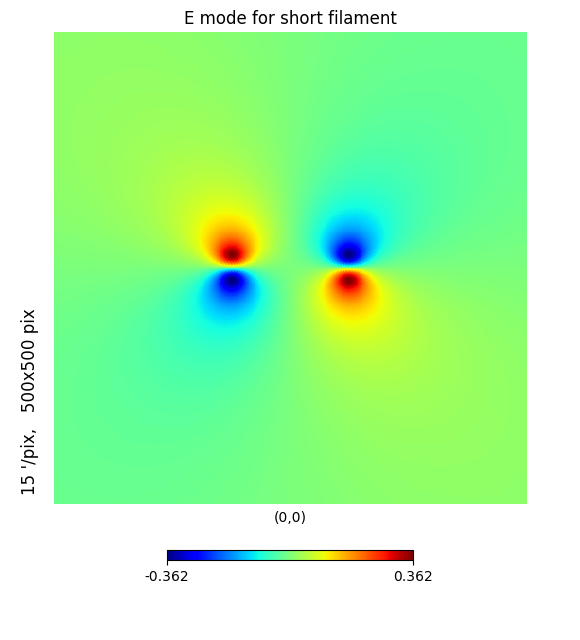

<IPython.core.display.Javascript object>


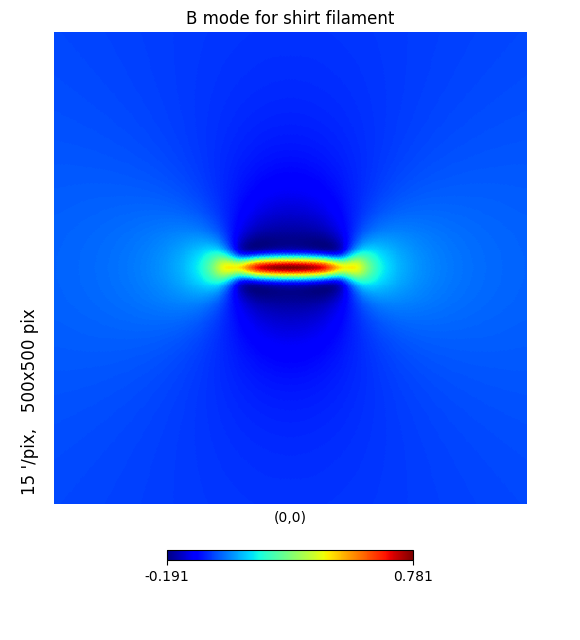

In [339]:
h.gnomview(tebl[1],xsize=500,reso=15,title="E mode for long filament")
h.gnomview(tebl[2],xsize=500,reso=15,title="B mode for long filament")
h.gnomview(tebs[1],xsize=500,reso=15,title="E mode for short filament")
h.gnomview(tebs[2],xsize=500,reso=15,title="B mode for shirt filament")

<IPython.core.display.Javascript object>


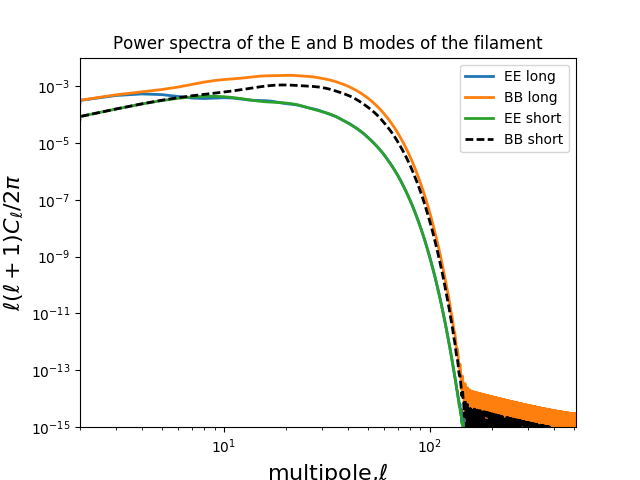

[]

In [340]:
cltebl=h.alm2cl(h.map2alm(tebl,lmax,pol=False))
cltebs=h.alm2cl(h.map2alm(tebs,lmax,pol=False))
figure()

title("Power spectra of the E and B modes of the filament")
plot(ell,fll*cltebl[1],lw=2,label="EE long")
plot(ell,fll*cltebl[2],lw=2,label="BB long")
plot(ell,fll*cltebs[1],"-",lw=2,label="EE short")
plot(ell,fll*cltebs[2],"k--",lw=2,label="BB short")
legend(loc=0)
xlabel("multipole,$\ell$",fontsize=16)
ylabel("$\ell(\ell+1)C_{\ell}/2 \pi$",fontsize=16)
xlim(2,lmax)
ylim(1e-15,1e-2)
loglog()

# Remarks:
- The longer filament generates more E mode power as compared to the short filament as one expects.
- <font color='red'>Both the long and short filaments generate same amount of B-mode power. The B-mode power is primarily because of edge effects. This important B-mode power will go missing in simulations which enforce periodic boundary conditions.</font>

# <font color='green'>Case 2</font>: Finite filaments with stochastic magnetic fields
- Here we consider filament of finite but different lengths again with the same general setting.
- <font color='cyan'>We incorporate the stochasticity of the magnetic field using the simple toy prescription of perturbing the phase of the Stokes parameters.</font>

${}_{+2}X = Q + i U = P e^{i\phi}$

$Q=1 ; U=0$ corresponds to $P=1 ~;~ \phi=0$

Here is exactly how we introduce the magnetic field stochasticity:
$\phi \rightarrow \phi + \delta\phi$

We model the phase perturbations as being Gaussian with zero means and hence completely characterized by its variance: $\sigma^2_{\delta \phi}$.

Now $\sigma_{\delta \phi} = 0$ corresponds to the coherent field as $\delta \phi = 0$ 

$\sigma_{\delta \phi}=\infty$ corresponds to the fully stochastic case as it destroys any coherence of the field and should result in equal amount of E and B mode power. Operationally this corresponds to sampling from a flat distribution in the range $[-\pi,\pi]$.

In principle the total polarization $P$ also depends on the magnetic field strength and orientation but in this first analysis we have ignored this effect and set P=1.

The new polarization map is given by the following expression:

${}_{+2}X' = e^{i (\phi_0 + \delta \phi)}$



<IPython.core.display.Javascript object>


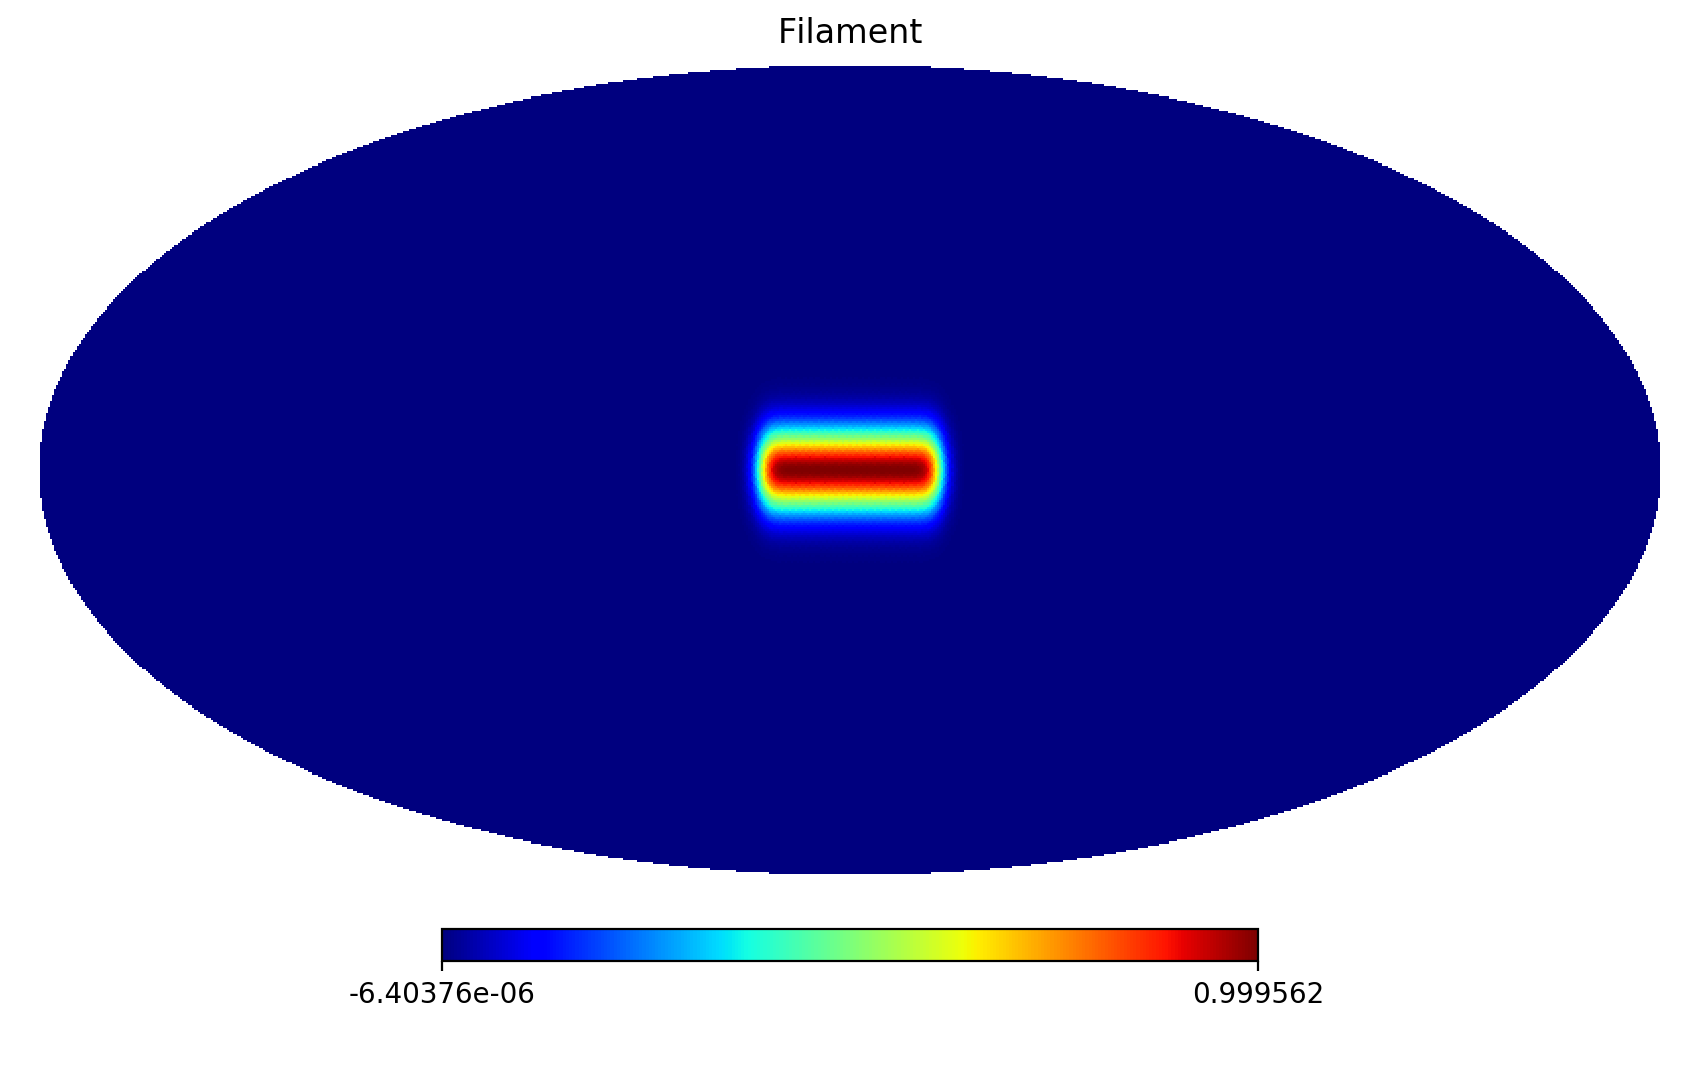

In [493]:
# Generating a filament
filament,nzmask=generate_filament(nside,2,40,5,2)
h.mollview(filament,title="Filament",rot=(0,0))

In [494]:
# Setting the polarization on the filament
sigma=0.001 ; mu=22.5*pi/180. 
deltaphi=random.normal(mu,sigma,sum(nzmask))
stoch_qu=[zeros(npix,float),zeros(npix,float)]
stoch_qu[0][nzmask==1]=cos(deltaphi)
stoch_qu[1][nzmask==1]=sin(deltaphi)
filqu0=[zeros(npix,float),stoch_qu[0]*filament,stoch_qu[1]*filament]

sigma=0.1 ; mu=0.1
deltaphi=random.normal(mu,sigma,sum(nzmask))
stoch_qu=[zeros(npix,float),zeros(npix,float)]
stoch_qu[0][nzmask==1]=cos(deltaphi)
stoch_qu[1][nzmask==1]=sin(deltaphi)

filqul=[zeros(npix,float),stoch_qu[0]*filament,stoch_qu[1]*filament]

sigma=0.001 ; mu=35.*pi/180.
print mu
deltaphi=random.normal(mu,sigma,sum(nzmask))
aran=random.normal(0,0.01,sum(nzmask))
pran=random.normal(0,0.001,sum(nzmask))
stoch_qu=[zeros(npix,float),zeros(npix,float)]
stoch_qu[0][nzmask==1]=cos(deltaphi+aran)
stoch_qu[1][nzmask==1]=sin(deltaphi+pran)

filquh=[zeros(npix,float),stoch_qu[0]*filament,stoch_qu[1]*filament]

0.610865238198


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2

<IPython.core.display.Javascript object>


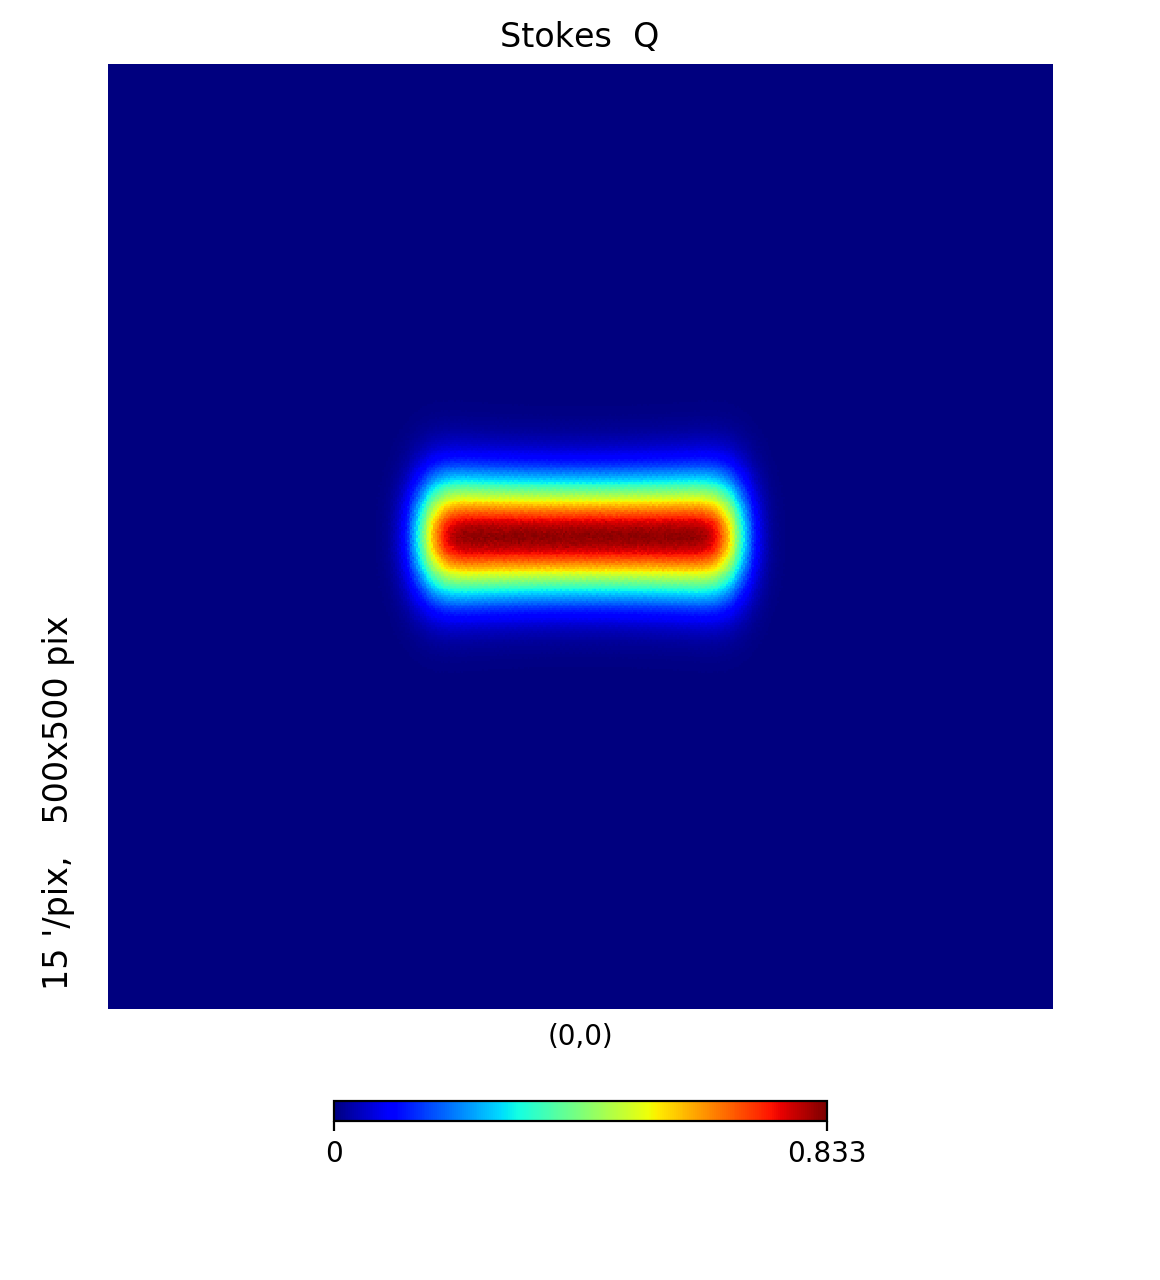

<IPython.core.display.Javascript object>


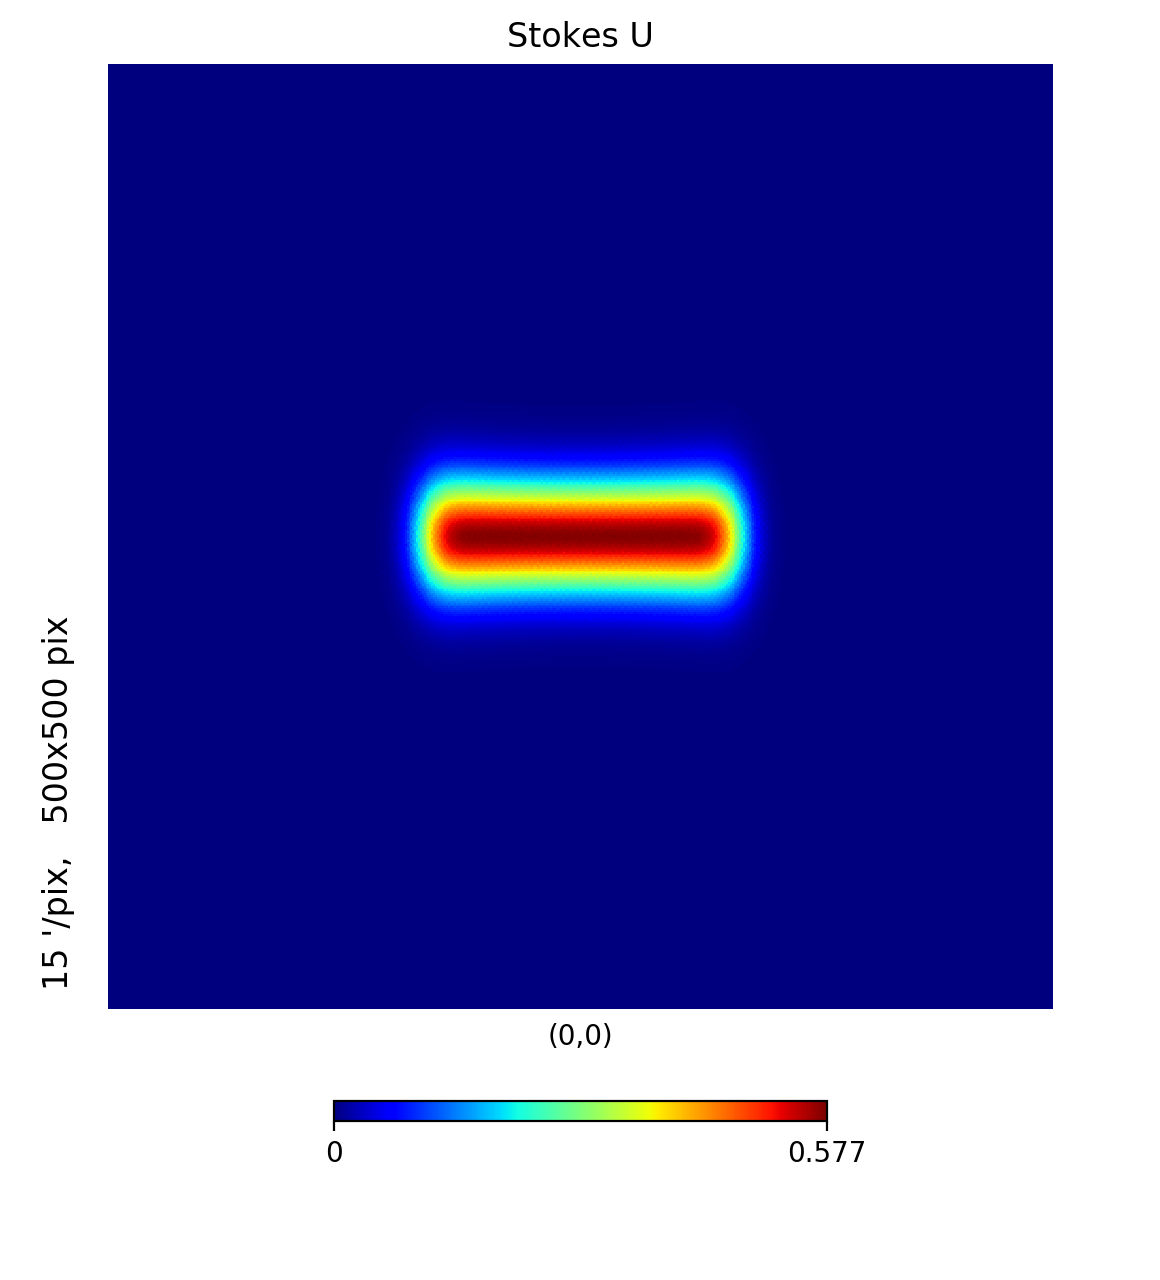

In [495]:
h.gnomview(filquh[1],xsize=500,reso=15,title="Stokes  Q")
h.gnomview(filquh[2],xsize=500,reso=15,title="Stokes U")

In [496]:
#teb0=h.alm2map(h.map2alm(filqu0,lmax=lmax,pol=True),nside,pol=False)
#tebl=h.alm2map(h.map2alm(filqul,lmax=lmax,pol=True),nside,pol=False)
tebh=h.alm2map(h.map2alm(filquh,lmax=lmax,pol=True),nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


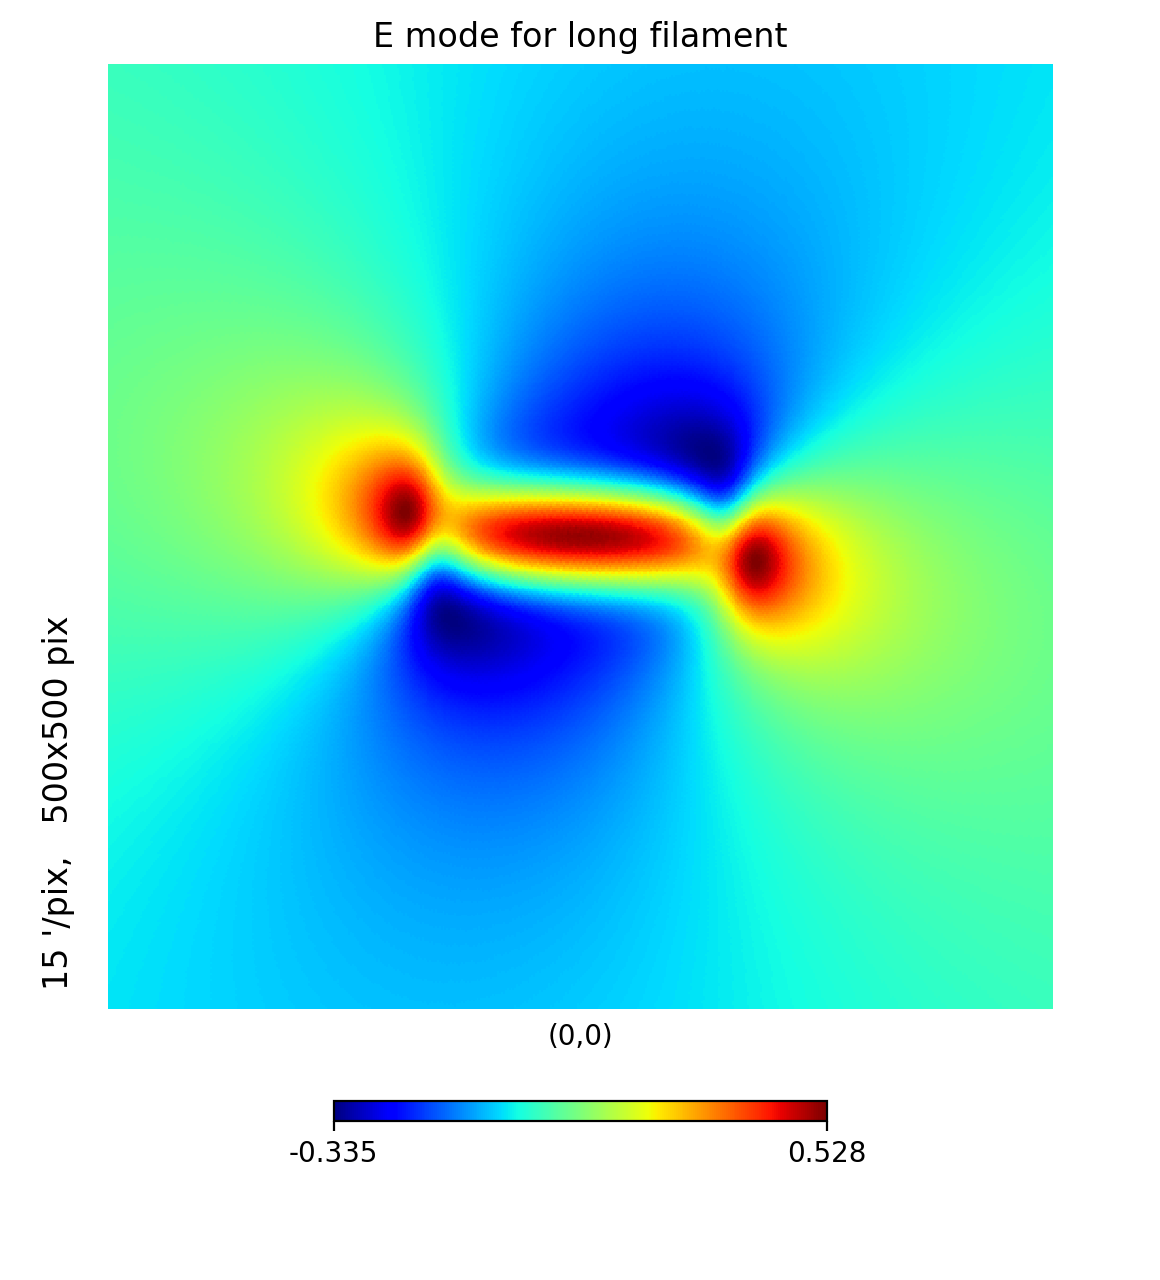

<IPython.core.display.Javascript object>


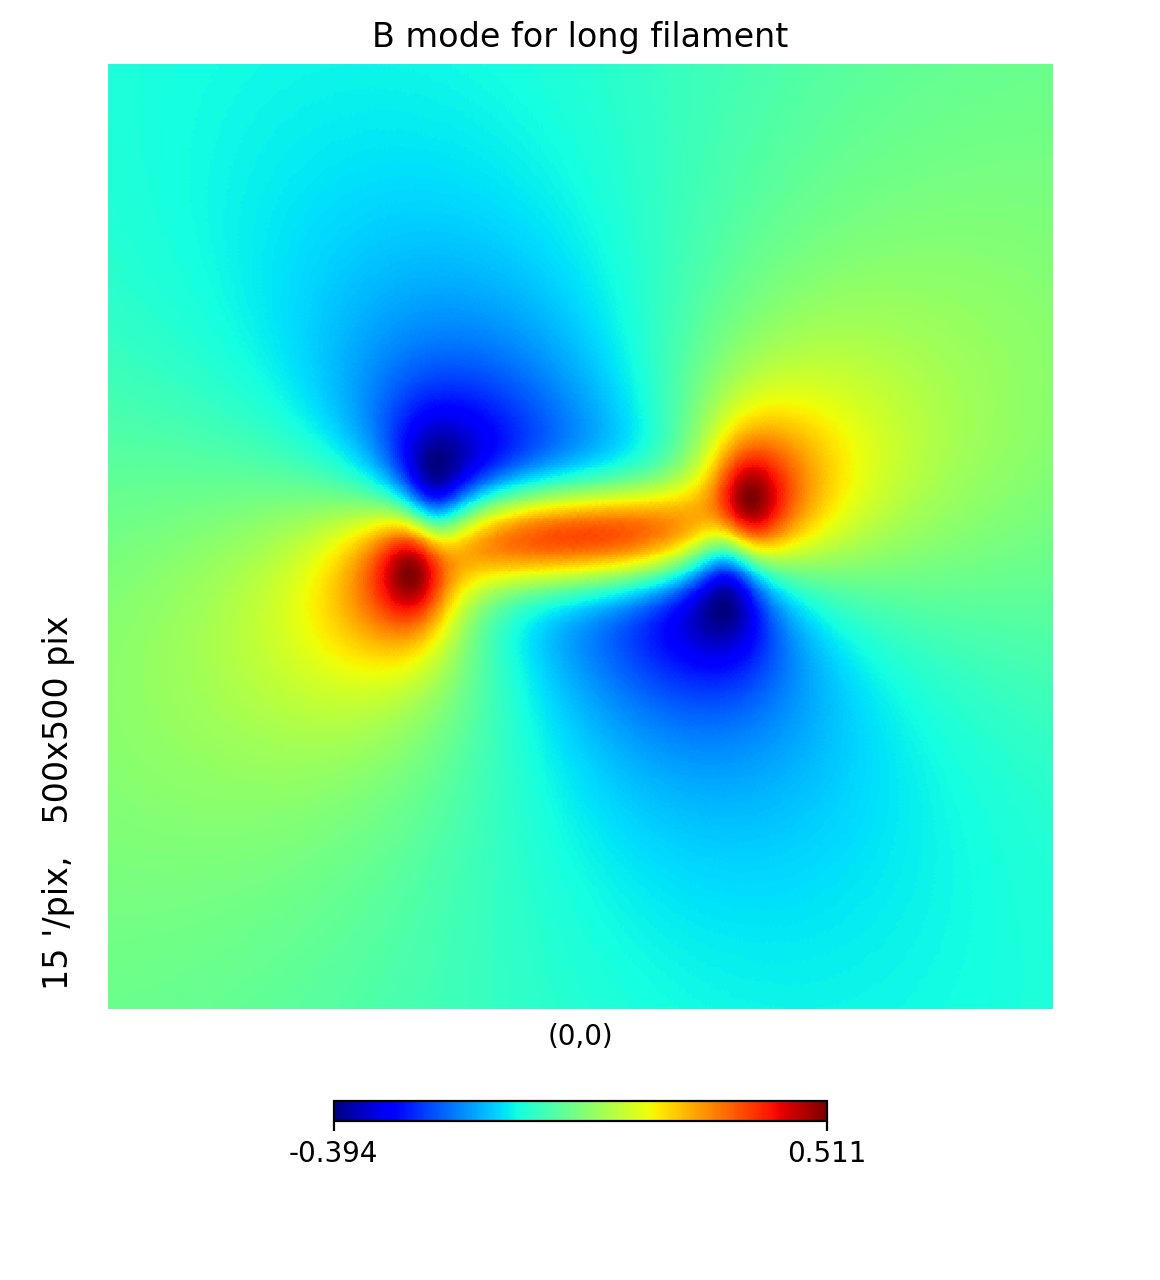

In [497]:
h.gnomview(tebh[1],xsize=500,reso=15,title="E mode for long filament")
h.gnomview(tebh[2],xsize=500,reso=15,title="B mode for long filament")

In [498]:
#clteb0=h.alm2cl(h.map2alm(teb0,lmax,pol=False))
#cltebl=h.alm2cl(h.map2alm(tebl,lmax,pol=False))
cltebh=h.alm2cl(h.map2alm(tebh,lmax,pol=False))

<IPython.core.display.Javascript object>


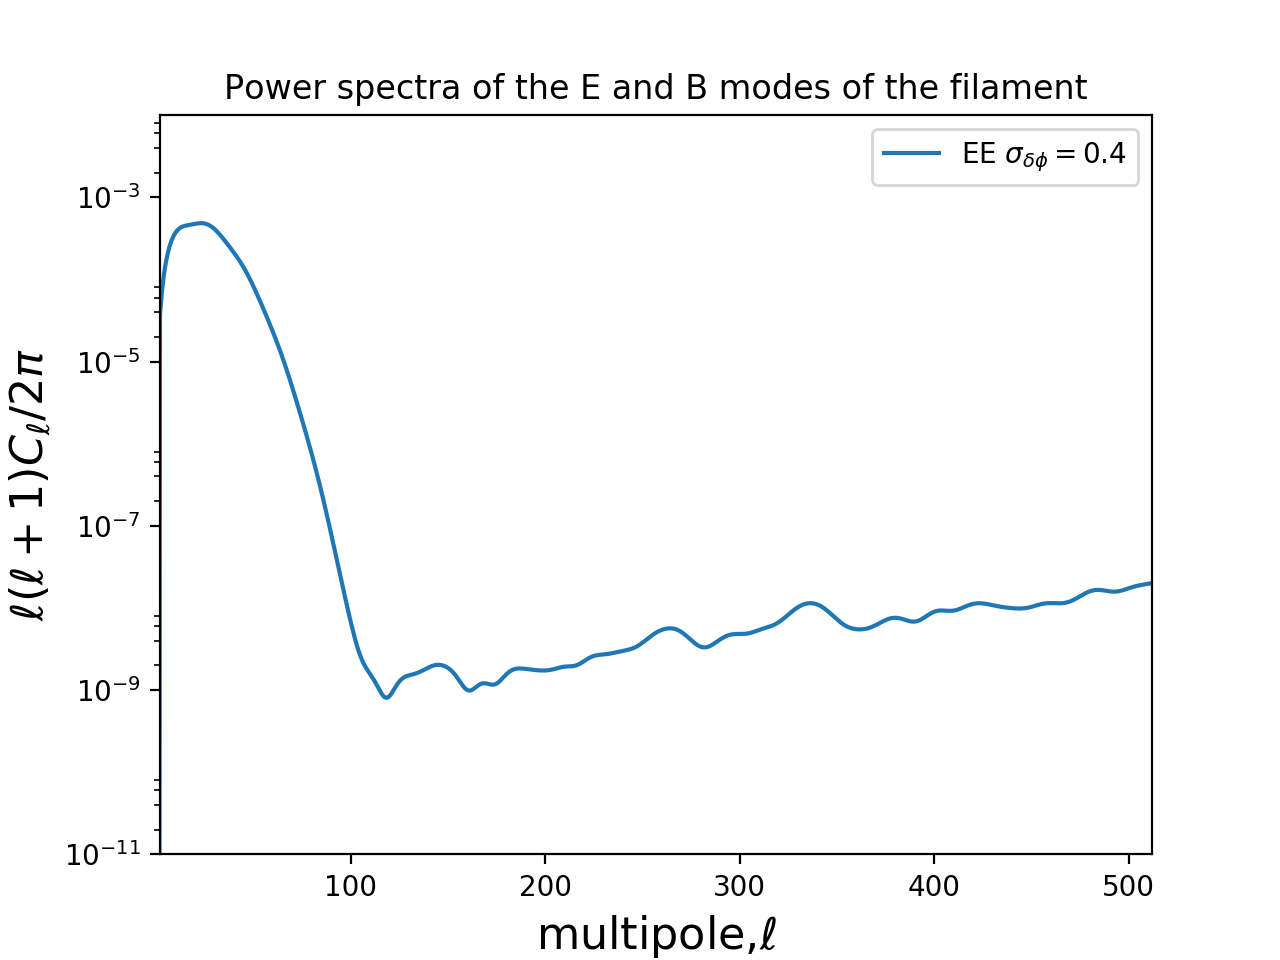

<IPython.core.display.Javascript object>


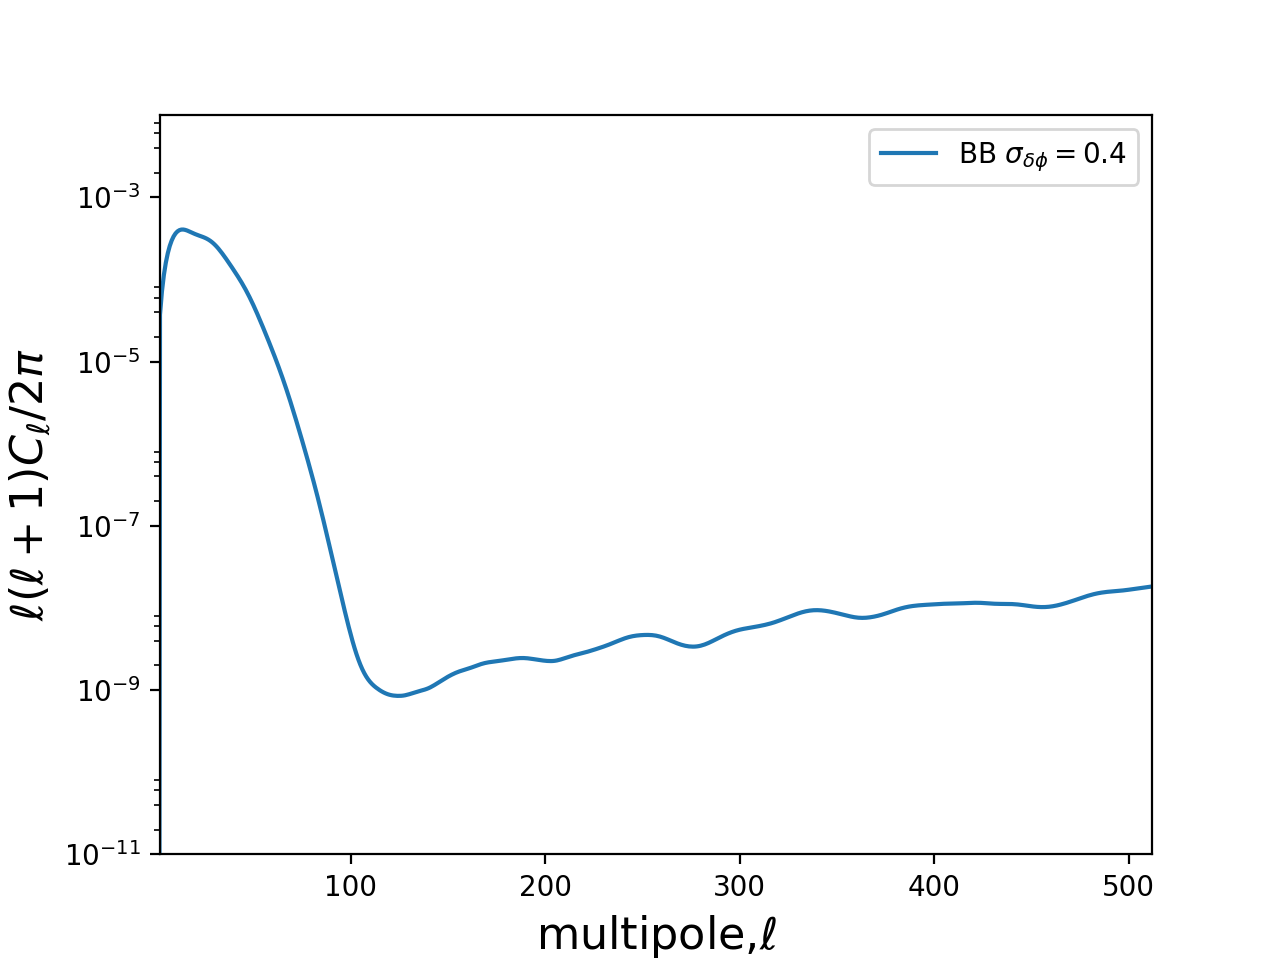

<IPython.core.display.Javascript object>


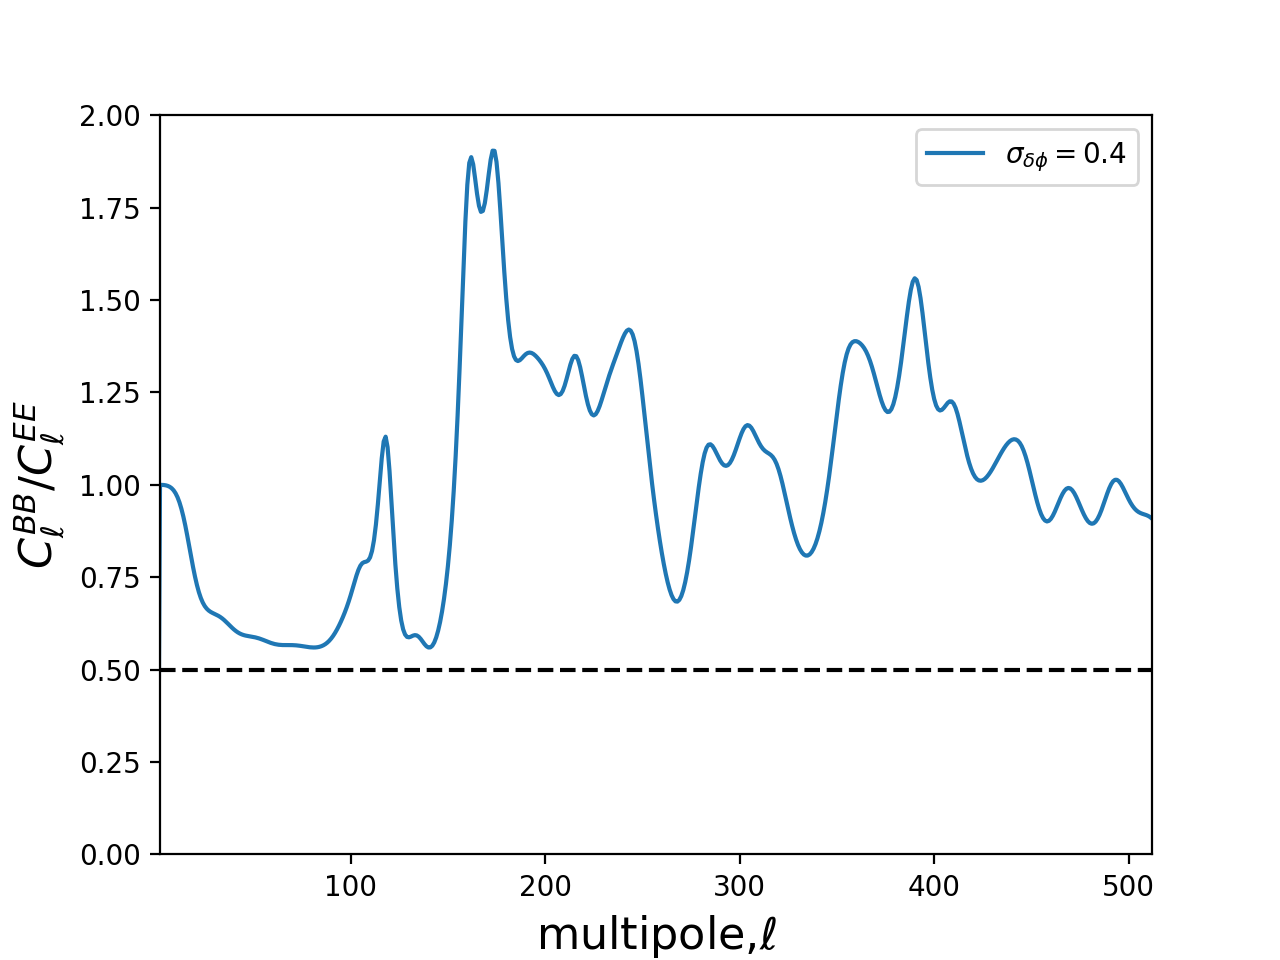

In [492]:
figure()
title("Power spectra of the E and B modes of the filament")
#plot(ell,fll*clteb0[1],label="EE $\sigma_{\delta \phi}=0$")
#plot(ell,fll*cltebl[1],label="EE $\sigma_{\delta \phi}=0.1$")
plot(ell,fll*cltebh[1],label="EE $\sigma_{\delta \phi}=0.4$")
legend(loc=0)
xlabel("multipole,$\ell$",fontsize=16)
ylabel("$\ell(\ell+1)C_{\ell}/2 \pi$",fontsize=16)
xlim(2,lmax)
axhline(0.0,color="black",linestyle="dashed")
semilogy()
ylim(1e-11,1e-2)

figure()
#plot(ell,fll*clteb0[2],label="BB $\sigma_{\delta \phi}=0$")
#plot(ell,fll*cltebl[2],label="BB $\sigma_{\delta \phi}=0.1$")
plot(ell,fll*cltebh[2],label="BB $\sigma_{\delta \phi}=0.4$")
legend(loc=0)
xlabel("multipole,$\ell$",fontsize=16)
ylabel("$\ell(\ell+1)C_{\ell}/2 \pi$",fontsize=16)
xlim(2,lmax)
axhline(0.0,color="black",linestyle="dashed")
semilogy()
ylim(1e-11,1e-2)

figure()
#plot(ell,clteb0[2]/clteb0[1],label="$\sigma_{\delta \phi}=0$")
#plot(ell,cltebl[2]/cltebl[1],label="$\sigma_{\delta \phi}=0.1$")
plot(ell,cltebh[2]/cltebh[1],label="$\sigma_{\delta \phi}=0.4$")
xlabel("multipole,$\ell$",fontsize=16)
ylabel("$C^{BB}_{\ell}/C^{EE}_{\ell}$",fontsize=16)
axhline(0.5,color="black",linestyle="dashed")
xlim(2,lmax)
ylim(0,2)
legend(loc=0)